In [17]:
from cmdstanpy import CmdStanModel

import arviz as az
import numpy as np
import scipy.stats as stats

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

In [18]:
data = pd.read_csv("logistic_reg_data.csv", index_col=0)
data.describe()

,x1,x2,x3,x4,x5,y
count,500.000000,500.000000,500.000000,5.000000e+02,5.000000e+02,500.000000
mean,-0.015777,0.334002,-0.001484,2.022817e-01,2.770684e-03,0.494000
std,0.578292,0.301507,0.383111,2.738984e-01,3.107472e-01,0.500465
min,-0.997592,0.000005,-0.992794,2.276756e-11,-9.880191e-01,0.000000
25%,-0.515144,0.064052,-0.136718,4.102616e-03,-3.628888e-02,0.000000
50%,-0.026042,0.254724,-0.000018,6.488454e-02,-1.278838e-08,0.000000
75%,0.475396,0.555544,0.107440,3.086316e-01,2.428165e-02,1.000000
max,0.999652,0.999305,0.998957,9.986100e-01,9.982628e-01,1.000000


In [19]:
model_ppc1 = CmdStanModel(stan_file = 'logistic_regression_ppc.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [20]:
R = 1000
data_ppc = dict(N = data.shape[0],
                M = 5,
                X = data.iloc[:,0:5].values,
                sigma = 10)
                
sim_ppc1 = model_ppc1.sample(data = data_ppc,
                            iter_sampling=R, iter_warmup=0,
                            chains=1,
                            refresh=R,
                            fixed_param=True,
                            seed=29042020)

df = sim_ppc1.draws_pd()
print(df)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:01 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.



     lp__  accept_stat__  prob_ppc[1]  prob_ppc[2]   prob_ppc[3]  prob_ppc[4]  \
0     0.0            0.0     0.007309     1.000000  9.982680e-01     0.000921   
1     0.0            0.0     0.117494     1.000000  5.992570e-01     0.250869   
2     0.0            0.0     0.000039     0.999584  2.067610e-02     0.000006   
3     0.0            0.0     0.033726     0.998428  2.272810e-04     0.011418   
4     0.0            0.0     0.026316     0.000038  5.096640e-15     0.000038   
..    ...            ...          ...          ...           ...          ...   
995   0.0            0.0     0.112019     0.996859  2.673980e-02     0.056031   
996   0.0            0.0     0.550595     0.295365  4.432160e-04     0.178437   
997   0.0            0.0     0.981980     0.002823  1.000000e+00     0.999273   
998   0.0            0.0     0.999246     1.000000  1.305100e-08     0.490329   
999   0.0            0.0     0.882743     1.000000  8.607060e-03     0.206139   

     prob_ppc[5]  prob_ppc

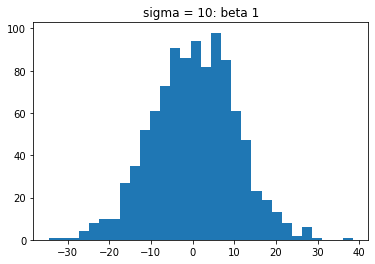

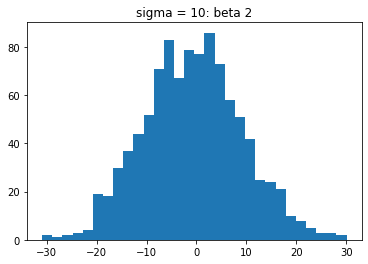

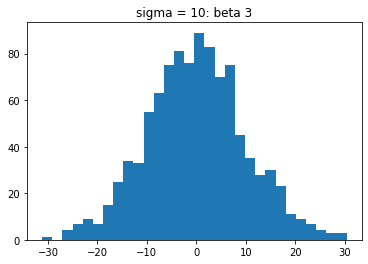

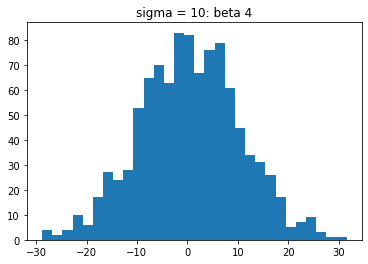

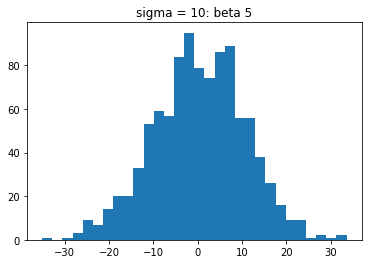

In [21]:
# Task 1.
# 1. Plot histograms of beta for prior model

def plot_betas(sim_ppc, sigma):
    title = "sigma = " + str(sigma)
    for i in range(len(sim_ppc.stan_variable('beta')[0])):
        plt.hist(sim_ppc.stan_variable('beta')[:,i], bins = 30)
        plt.title(title + ": beta " + str(i+1))
        plt.show()

plot_betas(sim_ppc1, 10)


INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:01 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:CmdStan start processing


chain 1 |██████████| 00:01 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:CmdStan start processing


chain 1 |██████████| 00:01 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


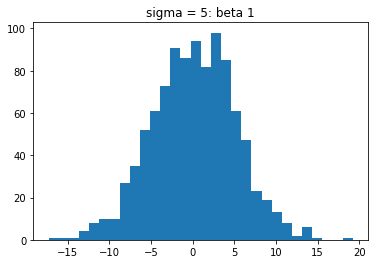

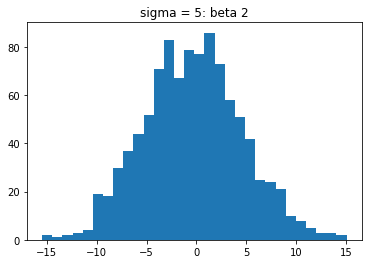

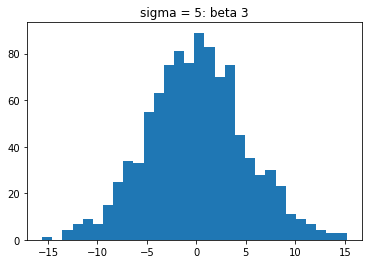

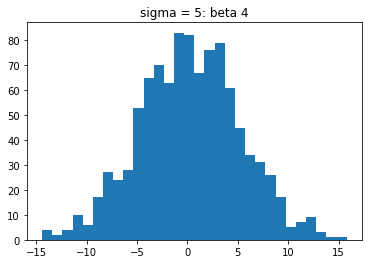

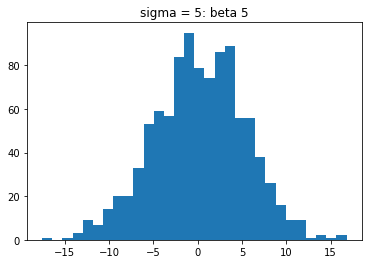

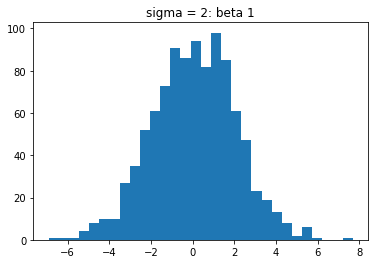

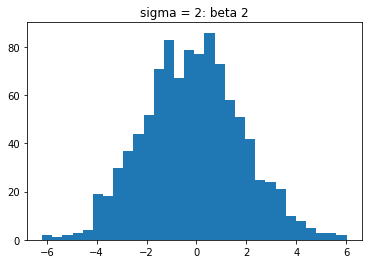

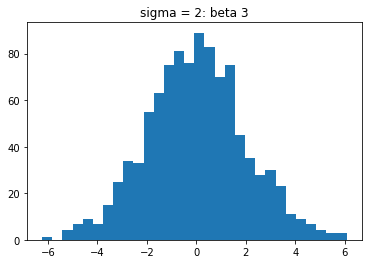

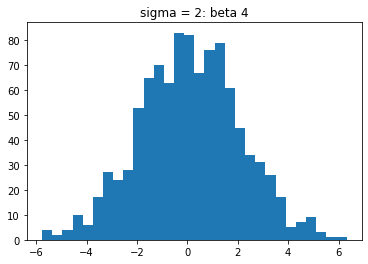

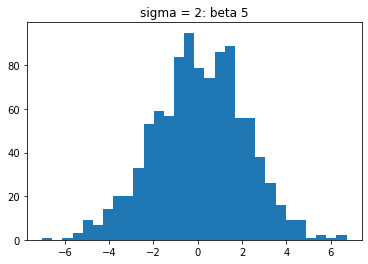

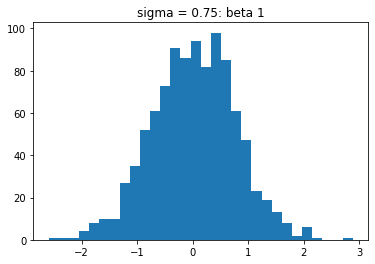

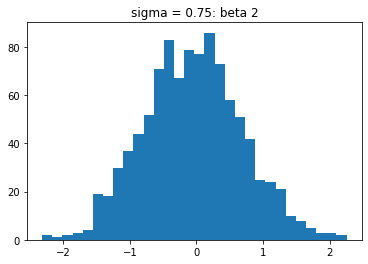

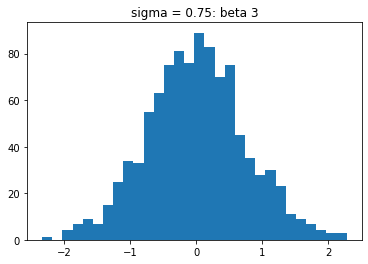

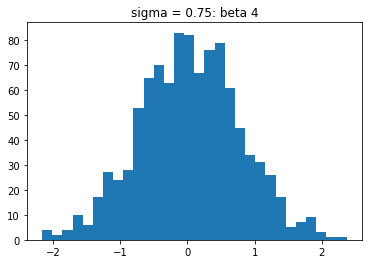

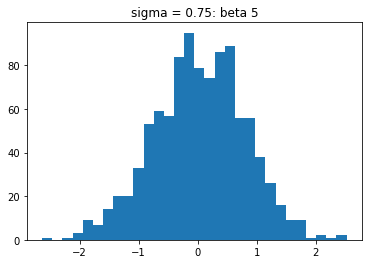

In [22]:
# 2. Plot again the same histograms but this time with other sigma values.
#       For instance use values: 5, 2, 0.75
# 3. Consider which result should be taken into account when selecting prior.

data_ppc_s5 = dict(N = data.shape[0],
                M = 5,
                X = data.iloc[:,0:5].values,
                sigma = 5)

data_ppc_s2 = dict(N = data.shape[0],
                M = 5,
                X = data.iloc[:,0:5].values,
                sigma = 2)

data_ppc_s075 = dict(N = data.shape[0],
                M = 5,
                X = data.iloc[:,0:5].values,
                sigma = 0.75)                
                
sim_ppc_s5 = model_ppc1.sample(data = data_ppc_s5,
                            iter_sampling=R, iter_warmup=0,
                            chains=1,
                            refresh=R,
                            fixed_param=True,
                            seed=29042020)

sim_ppc_s2 = model_ppc1.sample(data = data_ppc_s2,
                            iter_sampling=R, iter_warmup=0,
                            chains=1,
                            refresh=R,
                            fixed_param=True,
                            seed=29042020) 

sim_ppc_s075 = model_ppc1.sample(data = data_ppc_s075,
                            iter_sampling=R, iter_warmup=0,
                            chains=1,
                            refresh=R,
                            fixed_param=True,
                            seed=29042020) 


plot_betas(sim_ppc_s5, 5)

plot_betas(sim_ppc_s2, 2)
plot_betas(sim_ppc_s075, 0.75)
                                                                               

In [23]:
#Posterior inference

model = CmdStanModel(stan_file='logistic_regression.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [24]:
data_dict = dict(N = data.shape[0],
                 M = 5,
                 X = data.iloc[:,0:5].values,
                 y = data.y.values
                 )
fit = model.sample(data=data_dict, seed=4938483)
df = fit.draws_pd()
print(df)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████▌     | 00:00 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▊   | 00:01 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 00:02 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |███████▋  | 00:02 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |████████▏ | 00:02 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |████████▋ | 00:02 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████ | 00:03 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |█████████▌| 00:03 Iteration: 1800 / 2000 [ 90%]  (Sampling)


chain 1 |██


INFO:cmdstanpy:CmdStan done processing.



         lp__  accept_stat__  stepsize__  treedepth__  n_leapfrog__  \
0    -342.250       0.796669    0.296901          4.0          15.0   
1    -338.533       0.945683    0.296901          4.0          15.0   
2    -345.111       0.925225    0.296901          3.0           7.0   
3    -339.396       0.988671    0.296901          4.0          15.0   
4    -339.595       0.920632    0.296901          4.0          15.0   
...       ...            ...         ...          ...           ...   
3995 -339.632       0.882384    0.271850          4.0          15.0   
3996 -338.074       0.992227    0.271850          3.0          15.0   
3997 -337.803       0.956292    0.271850          3.0          15.0   
3998 -341.711       0.628503    0.271850          2.0           3.0   
3999 -337.776       0.979326    0.271850          2.0           7.0   

      divergent__  energy__   beta[1]   beta[2]   beta[3]  ...  prob_ppc[491]  \
0             0.0   345.743  1.007670 -1.585810 -1.194030  ...   

In [25]:
def plot_prob(fit):
    #plot
    prob_pcc = fit.stan_variable('prob_ppc')
    med_prob_ppc = np.percentile(fit.stan_variable('prob_ppc'),[25,50,75],axis=0)
    estimate_ppc_df = pd.DataFrame(med_prob_ppc.T,columns = ['lo','med','hi'])

    med = estimate_ppc_df['med'].mean()
    lo = med - estimate_ppc_df['lo'].mean()
    hi = estimate_ppc_df['hi'].mean() - med
    plt.errorbar(0, med, np.array([[lo], [hi]]), color='r')
    plt.scatter(0, data.y.values.mean(), color='b')
    plt.ylim([0.4, 0.6])
    plt.show()



INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:01 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:01 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:01 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:01 Iteration:  800 / 2000 [ 40%]  (Warmup)
chain 1 |█████     | 00:01 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)


cha


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)




chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:01 Iteration:  300 / 2000 [ 15%]  (Warmup)
chain 1 |██▋       | 00:01 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:01 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:01 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:01 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:01 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:02 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:02 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:02 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:03 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)

chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:01 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:01 Iteration:  400 / 2000 [ 20%]  (Warmup)



chain 1 |███▏      | 00:01 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:01 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:02 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:02 Iteration:  800 / 2000 [ 40%]  (Warmup)

chain 1 |█████     | 00:02 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:02 Iteration: 1001 / 2000 [ 50%]  (Sampling)
chain 1 |██████▎   | 00:03 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:03 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 


INFO:cmdstanpy:CmdStan done processing.


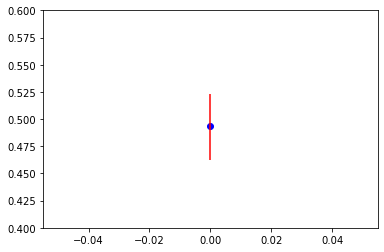

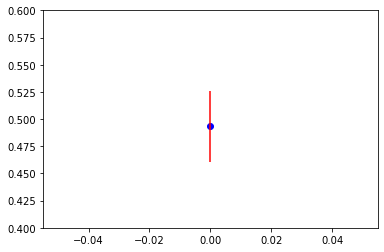

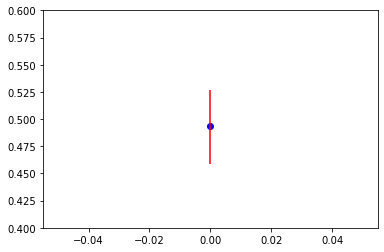

In [26]:
# Task 2.
# 1. Edit stan model and create models with different priors. Use original 
#       setting and some priors from task 1.
# 2. Fit the model
# 3. Plot the probability of individual outcome:
#       - plot generated parameter theta (prob_pcc): mean with its error bars (plt.errorbar)
#       - to plot its error bars take into consideration its 25th, 50th and 75th percentile
#       - also mark the real value of y, by different colored dots (for mean values)

model2 = CmdStanModel(stan_file='logistic_regression2.stan')
model3 = CmdStanModel(stan_file='logistic_regression3.stan')
model4 = CmdStanModel(stan_file='logistic_regression4.stan')

fit2 = model2.sample(data=data_dict, seed=4938483)
fit3 = model3.sample(data=data_dict, seed=4938483)
fit4 = model4.sample(data=data_dict, seed=4938483)

plot_prob(fit2)
plot_prob(fit3)
plot_prob(fit4)